In [1]:
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns
import pandas as pd
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.graphics.tsaplots import plot_pacf


In [2]:
df = pd.read_csv('../data/TG_STAID002759.txt', header=14)
df.columns = df.columns.str.replace(' ', '')
df['DATE'] = pd.to_datetime(df['DATE'], format='%Y%m%d')
df.set_index(df['DATE'], inplace=True)
df['TG'] = df['TG'].replace({-9999 : np.nan })
df['temp'] = df['TG']
df = df[['temp']].copy() * .1
df.sort_index(inplace= True)
df.head()


temp
DATE            
1876-01-01   2.2
1876-01-02   2.5
1876-01-03   0.3
1876-01-04  -5.8
1876-01-05  -9.8

In [3]:
#create test df
df_test = df['2019-10':].copy()
#create train df
df_train = df[:'2019-09'].copy()

In [4]:
df_train['temp'] = df_train['temp'].fillna(df_train['temp'].mean())

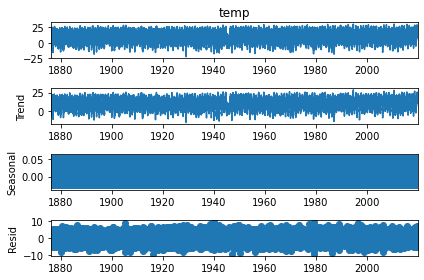

In [5]:
seasonal = seasonal_decompose(df_train['temp'].asfreq('d'))

seasonal.plot()
plt.show()


In [ ]:
from math import pi

import pandas as pd

from bokeh.io import show
from bokeh.models import BasicTicker, ColorBar, LinearColorMapper, PrintfTickFormatter
from bokeh.plotting import figure
from bokeh.sampledata.unemployment1948 import data

data['Year'] = data['Year'].astype(str)
data = data.set_index('Year')
data.drop('Annual', axis=1, inplace=True)
data.columns.name = 'Month'

years = list(data.index)
months = list(data.columns)

# reshape to 1D array or rates with a month and year for each row.
df = pd.DataFrame(data.stack(), columns=['rate']).reset_index()

# this is the colormap from the original NYTimes plot
colors = ["#75968f", "#a5bab7", "#c9d9d3", "#e2e2e2", "#dfccce", "#ddb7b1", "#cc7878", "#933b41", "#550b1d"]
mapper = LinearColorMapper(palette=colors, low=df.rate.min(), high=df.rate.max())

TOOLS = "hover,save,pan,box_zoom,reset,wheel_zoom"

p = figure(title="US Unemployment ({0} - {1})".format(years[0], years[-1]),
           x_range=years, y_range=list(reversed(months)),
           x_axis_location="above", plot_width=900, plot_height=400,
           tools=TOOLS, toolbar_location='below',
           tooltips=[('date', '@Month @Year'), ('rate', '@rate%')])

p.grid.grid_line_color = None
p.axis.axis_line_color = None
p.axis.major_tick_line_color = None
p.axis.major_label_text_font_size = "7px"
p.axis.major_label_standoff = 0
p.xaxis.major_label_orientation = pi / 3

p.rect(x="Year", y="Month", width=1, height=1,
       source=df,
       fill_color={'field': 'rate', 'transform': mapper},
       line_color=None)

color_bar = ColorBar(color_mapper=mapper, major_label_text_font_size="7px",
                     ticker=BasicTicker(desired_num_ticks=len(colors)),
                     formatter=PrintfTickFormatter(format="%d%%"),
                     label_standoff=6, border_line_color=None, location=(0, 0))
p.add_layout(color_bar, 'right')

show(p)      # show the plot